#Lung Disease Prediction - Supervised ML



###To build a Model that peredicts Lung Disease early by using Patient Information

##Decision Tree Algorithm

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
iris=load_iris()

In [ ]:
df=pd.DataFrame(data=iris.data,columns=iris.feature_names)

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
from google.colab import files
up=files.upload()

Saving lung_disease_data.csv to lung_disease_data.csv


In [ ]:
data=pd.read_csv(r'lung_disease_data.csv')

In [ ]:
df=pd.DataFrame(data)

In [ ]:
df

,Age,Gender,Smoking Status,Lung Capacity,Disease Type,Treatment Type,Hospital Visits,Recovered
0,71.0,Female,No,4.49,COPD,Therapy,14.0,Yes
1,34.0,Female,Yes,NaN,Bronchitis,Surgery,7.0,No
2,80.0,Male,Yes,1.95,COPD,NaN,4.0,Yes
3,40.0,Female,Yes,NaN,Bronchitis,Medication,1.0,No
4,43.0,Male,Yes,4.60,COPD,Surgery,NaN,Yes
...,...,...,...,...,...,...,...,...
5195,40.0,Male,No,1.43,Lung Cancer,Medication,1.0,Yes
5196,21.0,NaN,Yes,1.50,COPD,Medication,4.0,No
5197,42.0,Female,No,5.53,Pneumonia,Surgery,5.0,No
5198,82.0,Male,No,3.68,Bronchitis,Medication,9.0,No


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(90)

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Smoking Status,0
Lung Capacity,0
Disease Type,0
Treatment Type,0
Hospital Visits,0
Recovered,0


In [ ]:
df

,Age,Gender,Smoking Status,Lung Capacity,Disease Type,Treatment Type,Hospital Visits,Recovered
0,71.0,Female,No,4.49,COPD,Therapy,14.0,Yes
5,22.0,Female,No,3.65,Bronchitis,Medication,11.0,Yes
6,41.0,Male,Yes,2.98,Asthma,Medication,12.0,Yes
8,21.0,Female,No,4.05,Lung Cancer,Medication,12.0,No
9,49.0,Male,Yes,5.70,Pneumonia,Medication,11.0,Yes
...,...,...,...,...,...,...,...,...
5194,59.0,Female,Yes,1.05,Lung Cancer,Medication,11.0,No
5195,40.0,Male,No,1.43,Lung Cancer,Medication,1.0,Yes
5197,42.0,Female,No,5.53,Pneumonia,Surgery,5.0,No
5198,82.0,Male,No,3.68,Bronchitis,Medication,9.0,No


In [ ]:
df['Gender']=df['Gender'].replace("Male",1)
df['Gender']=df['Gender'].replace("Female",0)
df['Smoking Status']=df['Smoking Status'].replace("Yes",1)
df['Smoking Status']=df['Smoking Status'].replace("No",0)
df['Recovered']=df['Recovered'].replace("Yes",1)
df['Recovered']=df['Recovered'].replace("No",0)
df['Treatment Type']=df['Treatment Type'].replace("Therapy",1)
df['Treatment Type']=df['Treatment Type'].replace("Medication",0)
df['Treatment Type']=df['Treatment Type'].replace("Surgery",2)
df['Disease Type']=df['Disease Type'].replace("COPD",3)
df['Disease Type']=df['Disease Type'].replace("Lung Cancer",4)
df['Disease Type']=df['Disease Type'].replace("Pneumonia",5)
df['Disease Type']=df['Disease Type'].replace("Bronchitis",6)
df['Disease Type']=df['Disease Type'].replace("Asthma",7)


/tmp/ipython-input-3623855169.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender']=df['Gender'].replace("Female",0)
/tmp/ipython-input-3623855169.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Smoking Status']=df['Smoking Status'].replace("No",0)
/tmp/ipython-input-3623855169.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_op

In [ ]:
x=df[['Age','Gender','Treatment Type','Smoking Status','Hospital Visits','Recovered','Lung Capacity']]

In [ ]:
y=df[['Disease Type']]

In [ ]:
x

,Age,Gender,Treatment Type,Smoking Status,Hospital Visits,Recovered,Lung Capacity
0,71.0,0,1,0,14.0,1,4.49
5,22.0,0,0,0,11.0,1,3.65
6,41.0,1,0,1,12.0,1,2.98
8,21.0,0,0,0,12.0,0,4.05
9,49.0,1,0,1,11.0,1,5.70
...,...,...,...,...,...,...,...
5194,59.0,0,0,1,11.0,0,1.05
5195,40.0,1,0,0,1.0,1,1.43
5197,42.0,0,2,0,5.0,0,5.53
5198,82.0,1,0,0,9.0,0,3.68


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
model=DecisionTreeClassifier()

In [ ]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
print("acc",accuracy_score(y_test,y_pred))

acc 0.243048403707518


In [ ]:
import seaborn as sns
cm=confusion_matrix(y_test,y_pred)

<Axes: >

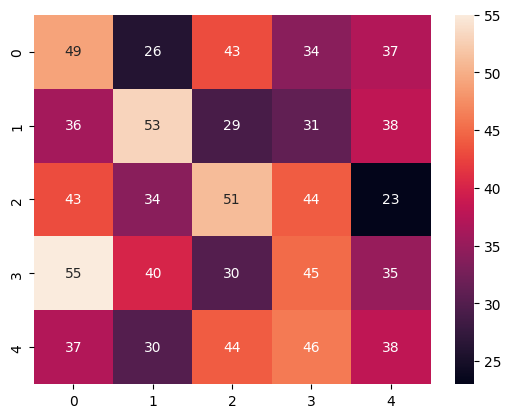

In [ ]:
sns.heatmap(cm,annot=True)

In [ ]:
cm

array([[49, 26, 43, 34, 37],
       [36, 53, 29, 31, 38],
       [43, 34, 51, 44, 23],
       [55, 40, 30, 45, 35],
       [37, 30, 44, 46, 38]])

In [ ]:
import pandas as pd
from google.colab import files

In [ ]:
df=pd.DataFrame(data)

In [ ]:
df

,Age,Gender,Smoking Status,Lung Capacity,Disease Type,Treatment Type,Hospital Visits,Recovered
0,71.0,Female,No,4.49,COPD,Therapy,14.0,Yes
1,34.0,Female,Yes,NaN,Bronchitis,Surgery,7.0,No
2,80.0,Male,Yes,1.95,COPD,NaN,4.0,Yes
3,40.0,Female,Yes,NaN,Bronchitis,Medication,1.0,No
4,43.0,Male,Yes,4.60,COPD,Surgery,NaN,Yes
...,...,...,...,...,...,...,...,...
5195,40.0,Male,No,1.43,Lung Cancer,Medication,1.0,Yes
5196,21.0,NaN,Yes,1.50,COPD,Medication,4.0,No
5197,42.0,Female,No,5.53,Pneumonia,Surgery,5.0,No
5198,82.0,Male,No,3.68,Bronchitis,Medication,9.0,No


In [ ]:
df.head()

,Age,Gender,Smoking Status,Lung Capacity,Disease Type,Treatment Type,Hospital Visits,Recovered,Age+10
0,71.0,F,No,4.49,COPD,Therapy,14.0000,Yes,81.0
1,34.0,F,Yes,NaN,Bronchitis,Surgery,7.0000,No,44.0
2,80.0,M,Yes,1.95,COPD,not mentioned,4.0000,Yes,90.0
3,40.0,F,Yes,NaN,Bronchitis,Medication,1.0000,No,50.0
4,43.0,M,Yes,4.60,COPD,Surgery,7.5288,Yes,53.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              4900 non-null   float64
 1   Gender           4900 non-null   object 
 2   Smoking Status   4900 non-null   object 
 3   Lung Capacity    4900 non-null   float64
 4   Disease Type     4900 non-null   object 
 5   Treatment Type   4900 non-null   object 
 6   Hospital Visits  4900 non-null   float64
 7   Recovered        4900 non-null   object 
dtypes: float64(3), object(5)
memory usage: 325.1+ KB


In [ ]:
df

,Age,Gender,Smoking Status,Lung Capacity,Disease Type,Treatment Type,Hospital Visits,Recovered
0,71.0,Female,No,4.49,COPD,Therapy,14.0,Yes
1,34.0,Female,Yes,NaN,Bronchitis,Surgery,7.0,No
2,80.0,Male,Yes,1.95,COPD,NaN,4.0,Yes
3,40.0,Female,Yes,NaN,Bronchitis,Medication,1.0,No
4,43.0,Male,Yes,4.60,COPD,Surgery,NaN,Yes
...,...,...,...,...,...,...,...,...
5195,40.0,Male,No,1.43,Lung Cancer,Medication,1.0,Yes
5196,21.0,NaN,Yes,1.50,COPD,Medication,4.0,No
5197,42.0,Female,No,5.53,Pneumonia,Surgery,5.0,No
5198,82.0,Male,No,3.68,Bronchitis,Medication,9.0,No


In [ ]:
df.describe()

,Age,Lung Capacity,Hospital Visits
count,4900.000000,4900.000000,4900.000000
mean,54.449796,3.501865,7.528571
std,20.126882,1.461179,3.996401
min,20.000000,1.000000,1.000000
25%,37.000000,2.220000,4.000000
50%,54.000000,3.480000,8.000000
75%,72.000000,4.800000,11.000000
max,89.000000,6.000000,14.000000


In [ ]:
df.isnull().sum()

,0
Age,300
Gender,300
Smoking Status,300
Lung Capacity,300
Disease Type,300
Treatment Type,300
Hospital Visits,300
Recovered,300


In [ ]:
df.duplicated().sum()

np.int64(91)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.dropna()

,Age,Gender,Smoking Status,Lung Capacity,Disease Type,Treatment Type,Hospital Visits,Recovered
0,71.0,Female,No,4.49,COPD,Therapy,14.0,Yes
5,22.0,Female,No,3.65,Bronchitis,Medication,11.0,Yes
6,41.0,Male,Yes,2.98,Asthma,Medication,12.0,Yes
8,21.0,Female,No,4.05,Lung Cancer,Medication,12.0,No
9,49.0,Male,Yes,5.70,Pneumonia,Medication,11.0,Yes
...,...,...,...,...,...,...,...,...
5177,52.0,Female,No,5.66,COPD,Surgery,5.0,No
5178,77.0,Male,Yes,2.48,Asthma,Surgery,10.0,No
5187,55.0,Male,Yes,5.25,Lung Cancer,Medication,14.0,No
5193,35.0,Female,Yes,3.80,COPD,Therapy,4.0,Yes


In [ ]:
df.fillna("no data")

,Age,Gender,Smoking Status,Lung Capacity,Disease Type,Treatment Type,Hospital Visits,Recovered
0,71.0,Female,No,4.49,COPD,Therapy,14.0,Yes
1,34.0,Female,Yes,no data,Bronchitis,Surgery,7.0,No
2,80.0,Male,Yes,1.95,COPD,no data,4.0,Yes
3,40.0,Female,Yes,no data,Bronchitis,Medication,1.0,No
4,43.0,Male,Yes,4.6,COPD,Surgery,no data,Yes
...,...,...,...,...,...,...,...,...
5188,80.0,Male,No,2.49,no data,Medication,13.0,Yes
5191,29.0,Female,No,3.36,Asthma,no data,6.0,Yes
5193,35.0,Female,Yes,3.8,COPD,Therapy,4.0,Yes
5194,59.0,Female,Yes,1.05,Lung Cancer,Medication,11.0,No


In [ ]:
avg=df['Hospital Visits'].mean()

In [ ]:
df['Hospital Visits'].fillna(avg,inplace=True)

/tmp/ipython-input-3597781198.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Hospital Visits'].fillna(avg,inplace=True)


In [ ]:
df

,Age,Gender,Smoking Status,Lung Capacity,Disease Type,Treatment Type,Hospital Visits,Recovered
0,71.0,Female,No,4.49,COPD,Therapy,14.0000,Yes
1,34.0,Female,Yes,NaN,Bronchitis,Surgery,7.0000,No
2,80.0,Male,Yes,1.95,COPD,NaN,4.0000,Yes
3,40.0,Female,Yes,NaN,Bronchitis,Medication,1.0000,No
4,43.0,Male,Yes,4.60,COPD,Surgery,7.5288,Yes
...,...,...,...,...,...,...,...,...
5188,80.0,Male,No,2.49,NaN,Medication,13.0000,Yes
5191,29.0,Female,No,3.36,Asthma,NaN,6.0000,Yes
5193,35.0,Female,Yes,3.80,COPD,Therapy,4.0000,Yes
5194,59.0,Female,Yes,1.05,Lung Cancer,Medication,11.0000,No


In [ ]:
df['Treatment Type'].fillna("not mentioned",inplace=True)

/tmp/ipython-input-3519247220.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Treatment Type'].fillna("not mentioned",inplace=True)


In [ ]:
df

,Age,Gender,Smoking Status,Lung Capacity,Disease Type,Treatment Type,Hospital Visits,Recovered
0,71.0,Female,No,4.49,COPD,Therapy,14.0000,Yes
1,34.0,Female,Yes,NaN,Bronchitis,Surgery,7.0000,No
2,80.0,Male,Yes,1.95,COPD,not mentioned,4.0000,Yes
3,40.0,Female,Yes,NaN,Bronchitis,Medication,1.0000,No
4,43.0,Male,Yes,4.60,COPD,Surgery,7.5288,Yes
...,...,...,...,...,...,...,...,...
5188,80.0,Male,No,2.49,NaN,Medication,13.0000,Yes
5191,29.0,Female,No,3.36,Asthma,not mentioned,6.0000,Yes
5193,35.0,Female,Yes,3.80,COPD,Therapy,4.0000,Yes
5194,59.0,Female,Yes,1.05,Lung Cancer,Medication,11.0000,No


In [ ]:
df.isnull().sum()

,0
Age,300
Gender,300
Smoking Status,300
Lung Capacity,299
Disease Type,300
Treatment Type,0
Hospital Visits,0
Recovered,300


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df

,Age,Gender,Smoking Status,Lung Capacity,Disease Type,Treatment Type,Hospital Visits,Recovered
0,71.0,Female,No,4.49,COPD,Therapy,14.0000,Yes
1,34.0,Female,Yes,NaN,Bronchitis,Surgery,7.0000,No
2,80.0,Male,Yes,1.95,COPD,not mentioned,4.0000,Yes
3,40.0,Female,Yes,NaN,Bronchitis,Medication,1.0000,No
4,43.0,Male,Yes,4.60,COPD,Surgery,7.5288,Yes
...,...,...,...,...,...,...,...,...
5188,80.0,Male,No,2.49,NaN,Medication,13.0000,Yes
5191,29.0,Female,No,3.36,Asthma,not mentioned,6.0000,Yes
5193,35.0,Female,Yes,3.80,COPD,Therapy,4.0000,Yes
5194,59.0,Female,Yes,1.05,Lung Cancer,Medication,11.0000,No


In [ ]:
df['Gender']=df['Gender'].replace("Male","M")

In [ ]:
df

,Age,Gender,Smoking Status,Lung Capacity,Disease Type,Treatment Type,Hospital Visits,Recovered
0,71.0,Female,No,4.49,COPD,Therapy,14.0000,Yes
1,34.0,Female,Yes,NaN,Bronchitis,Surgery,7.0000,No
2,80.0,M,Yes,1.95,COPD,not mentioned,4.0000,Yes
3,40.0,Female,Yes,NaN,Bronchitis,Medication,1.0000,No
4,43.0,M,Yes,4.60,COPD,Surgery,7.5288,Yes
...,...,...,...,...,...,...,...,...
5188,80.0,M,No,2.49,NaN,Medication,13.0000,Yes
5191,29.0,Female,No,3.36,Asthma,not mentioned,6.0000,Yes
5193,35.0,Female,Yes,3.80,COPD,Therapy,4.0000,Yes
5194,59.0,Female,Yes,1.05,Lung Cancer,Medication,11.0000,No


In [ ]:
df['Gender']=df['Gender'].replace("Female","F")

In [ ]:
df

,Age,Gender,Smoking Status,Lung Capacity,Disease Type,Treatment Type,Hospital Visits,Recovered
0,71.0,F,No,4.49,COPD,Therapy,14.0000,Yes
1,34.0,F,Yes,NaN,Bronchitis,Surgery,7.0000,No
2,80.0,M,Yes,1.95,COPD,not mentioned,4.0000,Yes
3,40.0,F,Yes,NaN,Bronchitis,Medication,1.0000,No
4,43.0,M,Yes,4.60,COPD,Surgery,7.5288,Yes
...,...,...,...,...,...,...,...,...
5188,80.0,M,No,2.49,NaN,Medication,13.0000,Yes
5191,29.0,F,No,3.36,Asthma,not mentioned,6.0000,Yes
5193,35.0,F,Yes,3.80,COPD,Therapy,4.0000,Yes
5194,59.0,F,Yes,1.05,Lung Cancer,Medication,11.0000,No


In [ ]:
df['Age+10']=df['Age']+10

In [ ]:
df

,Age,Gender,Smoking Status,Lung Capacity,Disease Type,Treatment Type,Hospital Visits,Recovered,Age+10
0,71.0,F,No,4.49,COPD,Therapy,14.0000,Yes,81.0
1,34.0,F,Yes,NaN,Bronchitis,Surgery,7.0000,No,44.0
2,80.0,M,Yes,1.95,COPD,not mentioned,4.0000,Yes,90.0
3,40.0,F,Yes,NaN,Bronchitis,Medication,1.0000,No,50.0
4,43.0,M,Yes,4.60,COPD,Surgery,7.5288,Yes,53.0
...,...,...,...,...,...,...,...,...,...
5188,80.0,M,No,2.49,NaN,Medication,13.0000,Yes,90.0
5191,29.0,F,No,3.36,Asthma,not mentioned,6.0000,Yes,39.0
5193,35.0,F,Yes,3.80,COPD,Therapy,4.0000,Yes,45.0
5194,59.0,F,Yes,1.05,Lung Cancer,Medication,11.0000,No,69.0


In [ ]:
Hospital_Visits_mean=df['Hospital Visits'].mean()

In [ ]:
df

,Age,Gender,Smoking Status,Lung Capacity,Disease Type,Treatment Type,Hospital Visits,Recovered,Age+10
0,71.0,F,No,4.49,COPD,Therapy,14.0000,Yes,81.0
1,34.0,F,Yes,NaN,Bronchitis,Surgery,7.0000,No,44.0
2,80.0,M,Yes,1.95,COPD,not mentioned,4.0000,Yes,90.0
3,40.0,F,Yes,NaN,Bronchitis,Medication,1.0000,No,50.0
4,43.0,M,Yes,4.60,COPD,Surgery,7.5288,Yes,53.0
...,...,...,...,...,...,...,...,...,...
5188,80.0,M,No,2.49,NaN,Medication,13.0000,Yes,90.0
5191,29.0,F,No,3.36,Asthma,not mentioned,6.0000,Yes,39.0
5193,35.0,F,Yes,3.80,COPD,Therapy,4.0000,Yes,45.0
5194,59.0,F,Yes,1.05,Lung Cancer,Medication,11.0000,No,69.0


In [ ]:
median=df['Hospital Visits'].median()

In [ ]:
df

,Age,Gender,Smoking Status,Lung Capacity,Disease Type,Treatment Type,Hospital Visits,Recovered,Age+10
0,71.0,F,No,4.49,COPD,Therapy,14.0000,Yes,81.0
1,34.0,F,Yes,NaN,Bronchitis,Surgery,7.0000,No,44.0
2,80.0,M,Yes,1.95,COPD,not mentioned,4.0000,Yes,90.0
3,40.0,F,Yes,NaN,Bronchitis,Medication,1.0000,No,50.0
4,43.0,M,Yes,4.60,COPD,Surgery,7.5288,Yes,53.0
...,...,...,...,...,...,...,...,...,...
5188,80.0,M,No,2.49,NaN,Medication,13.0000,Yes,90.0
5191,29.0,F,No,3.36,Asthma,not mentioned,6.0000,Yes,39.0
5193,35.0,F,Yes,3.80,COPD,Therapy,4.0000,Yes,45.0
5194,59.0,F,Yes,1.05,Lung Cancer,Medication,11.0000,No,69.0


#Group & PivotBy

In [ ]:
group=df.groupby('Treatment Type')['Hospital Visits'].mean()

In [ ]:
group

,Hospital Visits
Treatment Type,
Medication,7.580903
Surgery,7.564032
Therapy,7.460460
not mentioned,7.434293


In [ ]:
pivot=pd.pivot_table(df,
                     values='Hospital Visits',
                     index='Treatment Type',
                     columns='Gender',
                     aggfunc=['mean','sum']
                     )

In [ ]:
pivot

mean                    sum             
Gender                 F         M            F            M
Treatment Type                                              
Medication      7.402692  7.721403  5685.267207  5899.152007
Surgery         7.626472  7.532021  5765.612809  5355.267207
Therapy         7.538730  7.416360  5880.209607  5554.853608
not mentioned   7.056025  7.757429   896.115201  1194.644001

#Matplot Visualization





In [ ]:
import matplotlib.pyplot as plt


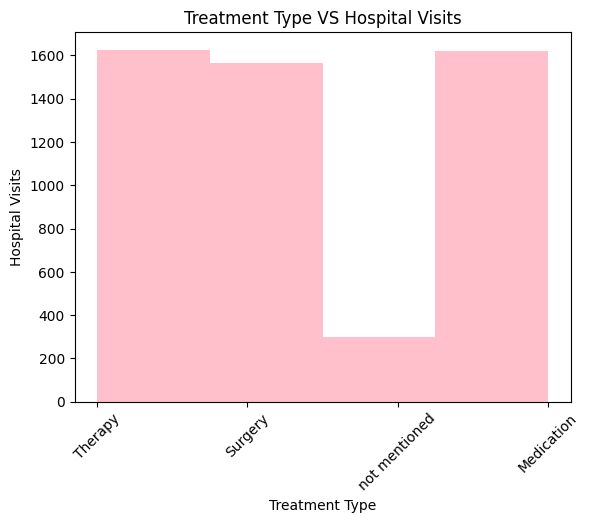

In [ ]:
plt.hist(df['Treatment Type'],color='pink',bins=4)
plt.xlabel("Treatment Type")
plt.ylabel("Hospital Visits")
plt.xticks(rotation=45)
plt.title("Treatment Type VS Hospital Visits")
plt.show()

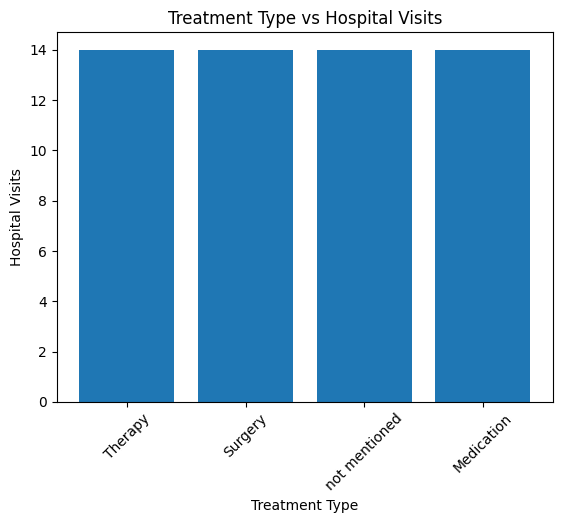

In [ ]:
plt.bar(df['Treatment Type'],df['Hospital Visits'])
plt.title("Treatment Type vs Hospital Visits")
plt.xlabel("Treatment Type")
plt.ylabel("Hospital Visits")
plt.xticks(rotation=45)
plt.show()

In [ ]:
group1=df.groupby('Treatment Type')['Hospital Visits'].sum()

In [ ]:
group1

,Hospital Visits
Treatment Type,
Medication,12281.063215
Surgery,11822.581618
Therapy,12130.707216
not mentioned,2230.288002


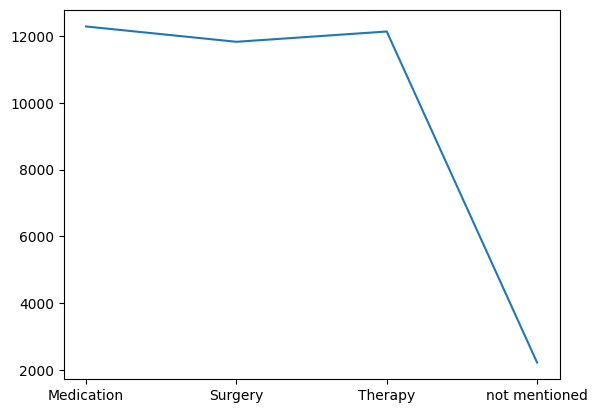

In [ ]:
plt.plot(group1)
plt.show()

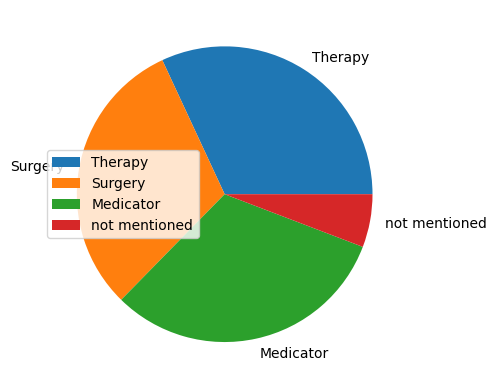

In [ ]:
plt.pie(group1,labels=['Therapy','Surgery','Medicator','not mentioned'])
plt.legend()


#Dashboard

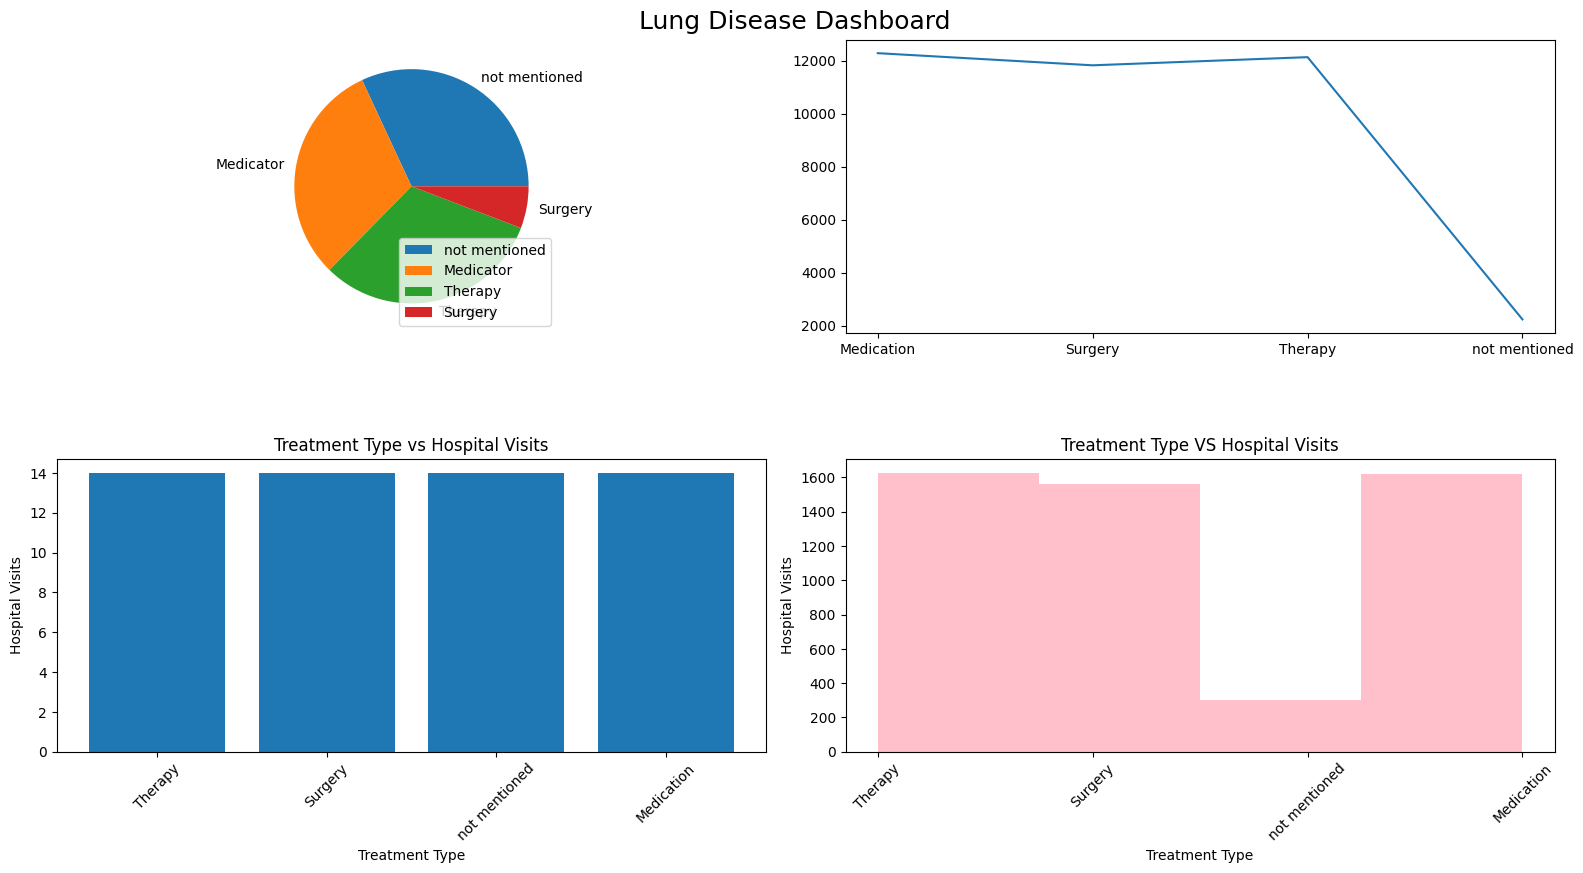

In [ ]:
plt.figure(figsize=(16,12))
plt.suptitle("Lung Disease Dashboard",fontsize=18)
plt.subplot(3,2,1)
plt.pie(group1,labels=['not mentioned','Medicator','Therapy','Surgery'])
plt.legend()
plt.subplot(3,2,2)
plt.plot(group1)
plt.subplot(3,2,3)
plt.bar(df['Treatment Type'],df['Hospital Visits'])
plt.title("Treatment Type vs Hospital Visits")
plt.xlabel("Treatment Type")
plt.ylabel("Hospital Visits")
plt.xticks(rotation=45)
plt.subplot(3,2,4)
plt.hist(df['Treatment Type'],color='pink',bins=4)
plt.xlabel("Treatment Type")
plt.ylabel("Hospital Visits")
plt.xticks(rotation=45)
plt.title("Treatment Type VS Hospital Visits")
plt.tight_layout()
plt.show()

##Download Model

In [ ]:
import pickle

In [ ]:
with open("model.pkl", "wb")as f:
  pickle.dump(model,f)

In [ ]:
from google.colab import files
files.download("model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pickle
pickle.dump(model,open("model.pkl","wb"))

In [90]:
import pandas as pd

print("Enter patient details to predict disease type:\n")

age = int(input("Age: "))
lung_capacity = float(input("Lung Capacity: "))
smoking = input("Smoking Status (Yes/No): ")
gender = input("Gender (M/F): ")
visits = int(input("Hospital Visits: "))
recovered = input("Recovered (Yes/No): ")
treatment = input("Treatment Type: ")

# Create input dataframe
input_data = pd.DataFrame([{
    'Age': age,
    'Lung Capacity': lung_capacity,
    'Smoking Status': smoking,
    'Gender': gender,
    'Hospital Visits': visits,
    'Recovered': recovered,
    'Treatment Type': treatment
}])

# IMPORTANT: reorder columns to match training EXACTLY
input_data = input_data[model.feature_names_in_]

# IMPORTANT: use the same encoders from training
# Example encodings (MUST match your training)
binary_map = {
    "Yes": 1,
    "No": 0,
    "M": 1,
    "F": 0
}

for col in ['Smoking Status', 'Gender', 'Recovered']:
    input_data[col] = input_data[col].map(binary_map)

# If you had label encoding for Treatment Type during training
# Replace this with your REAL mapping
treatment_mapping = {
    'Type A': 0,
    'Type B': 1,
    'Type C': 2
}
input_data['Treatment Type'] = input_data['Treatment Type'].map(treatment_mapping)

# Convert to numeric
input_data = input_data.apply(pd.to_numeric)

# Predict
prediction = model.predict(input_data)
print("\nPredicted Disease Type:", prediction[0])


Enter patient details to predict disease type:

Age: 5
Lung Capacity: 8
Smoking Status (Yes/No): yes
Gender (M/F): m
Hospital Visits: 6
Recovered (Yes/No): no
Treatment Type: Surgery

Predicted Disease Type: 7
